Type: Learning Project \
Author: Yash K
        
## About: Predict customer Churn
customer churn = rate of customers leaving the services of the company

In [80]:
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#utilities
from tqdm.notebook import tqdm #to visualize loops as progress bars

#data 
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ml
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [55]:
#read data
df = pd.read_csv("churn.csv")

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [58]:
df.shape

(7043, 21)

###### Stats and visualization

In [59]:
#check if any data is missing
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This means there is no data missing in any of the columns

In [60]:
#show stats
df.describe() #only describes continuous variables

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
#get customer churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [62]:
#percentage retained or left
retained = df[df['Churn']=='No'].shape[0]
left = df[df['Churn']=='Yes'].shape[0]
print('% retained', (retained*100)/(retained+left))
print('% left', (left*100)/(retained+left))

% retained 73.46301292063042
% left 26.536987079369588


<AxesSubplot:xlabel='InternetService', ylabel='count'>

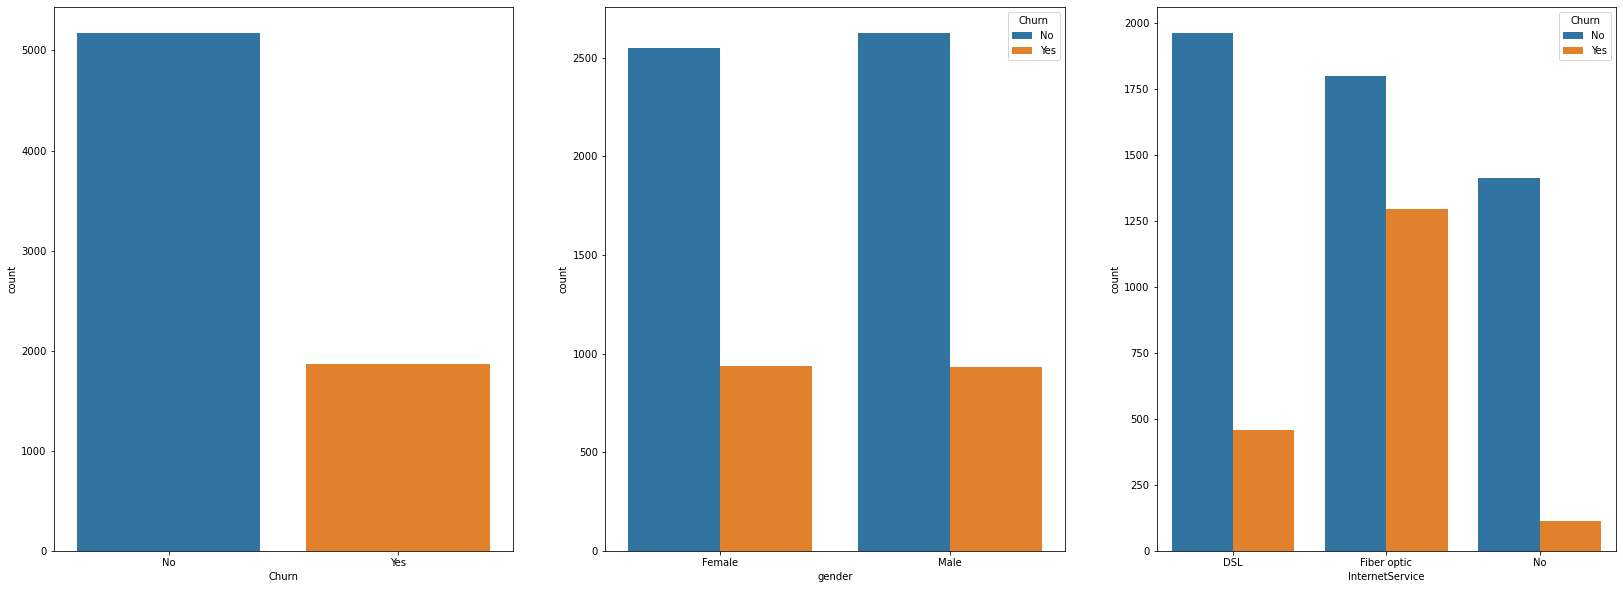

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(28,10))

#just visualize churn
sns.countplot(df['Churn'], ax=ax[0])

#visulaize churn based on gender
sns.countplot(x ='gender', hue='Churn', data=df, ax=ax[1])

#visulaize churn based on internetservice
sns.countplot(x ='InternetService', hue='Churn', data=df, ax=ax[2])

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

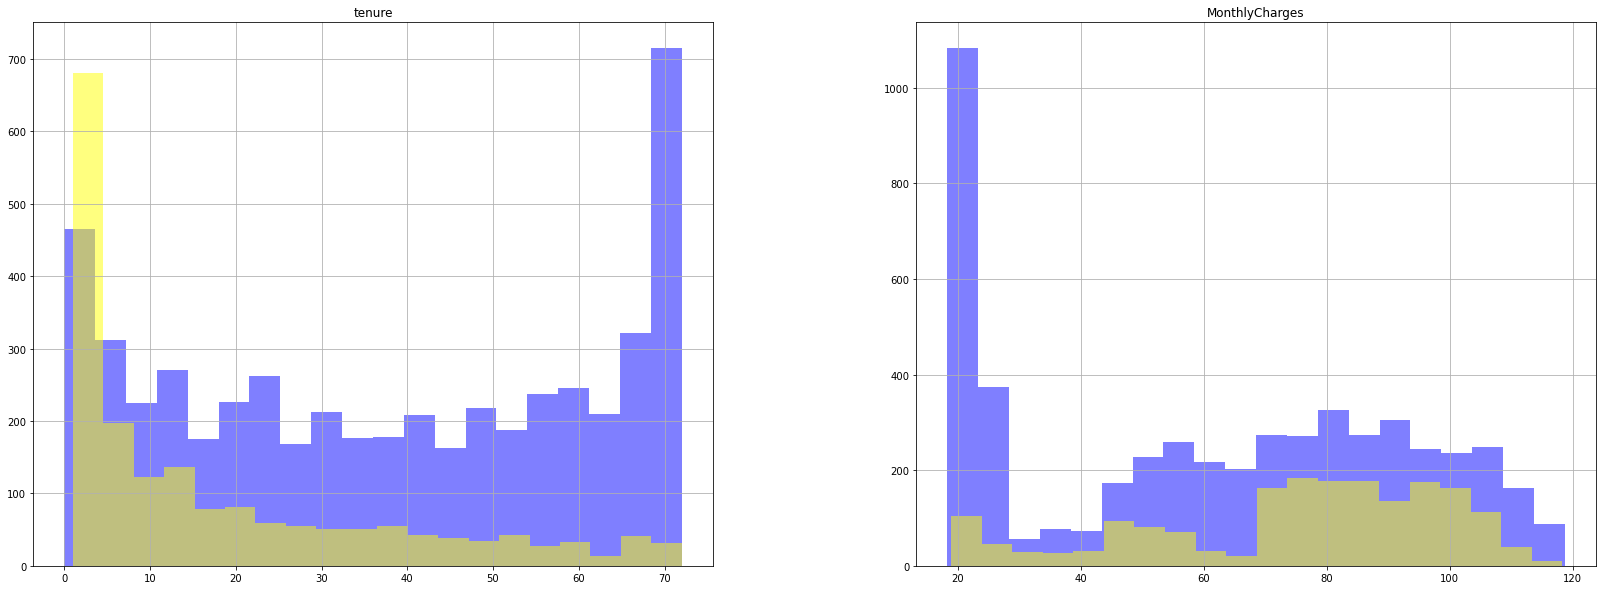

In [64]:
#visualize numeric data
numeric_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28,10))
df[df['Churn']=='No'][numeric_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df['Churn']=='Yes'][numeric_features].hist(bins=20, color='yellow', alpha=0.5, ax=ax)

##### Data preprocessing

In [65]:
#drop customer id as not needed
cleanDF = df.drop('customerID', axis=1)

In [66]:
#convert non-numeric columns into numeric columns
s = (cleanDF.dtypes != np.number)
object_cols = list(s[s].index)

In [67]:
object_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [68]:
for col in object_cols:
    cleanDF[col]=LabelEncoder().fit_transform(cleanDF[col])

In [69]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [71]:
#see data-types
cleanDF.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [73]:
#create X and y
X=cleanDF.drop('Churn', axis=1)
y=cleanDF['Churn']

#scale data
X=StandardScaler().fit_transform(X)

In [75]:
X[:5]

array([[-1.00955867, -0.43991649,  1.03453023, -0.65401193, -1.27744458,
        -3.05401039,  0.06272275, -1.18323364, -0.91883775,  1.24254983,
        -1.02791014, -0.92526212, -1.11349541, -1.12140513, -0.8282069 ,
         0.8297975 ,  0.39855772, -1.16032292, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.06632742,
         0.32743831, -0.9915883 , -1.18323364,  1.40732123, -1.02991925,
         1.24511061, -0.92526212, -1.11349541, -1.12140513,  0.37127103,
        -1.20511329,  1.33486261, -0.25962894, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193, -1.23672422,
         0.32743831, -0.9915883 , -1.18323364,  1.40732123,  1.24254983,
        -1.02791014, -0.92526212, -1.11349541, -1.12140513, -0.8282069 ,
         0.8297975 ,  1.33486261, -0.36266036, -1.64188328],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.51425142,
        -3.05401039,  0.06272275, -1.18323364,  1.40732123, -1.02991925,
         1.245

In [77]:
#split into 80 train and 20 test
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

##### Create and train the model

In [78]:
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [79]:
predictions = model.predict(xtest)

In [81]:
print('Accuracy:', accuracy_score(ytest, predictions))

Accuracy: 0.8161816891412349


In [82]:
print('Balanced accuracy score:', balanced_accuracy_score(ytest, predictions))

Balanced accuracy score: 0.7351692941505275


In [84]:
print('Complete report: precision/recall/f1-score\n')
print(classification_report(ytest, predictions))

Complete report: precision/recall/f1-score

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

